<a href="https://colab.research.google.com/github/2303A51263/NLP-LAB-2303A51263/blob/main/08_08_2025_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...   

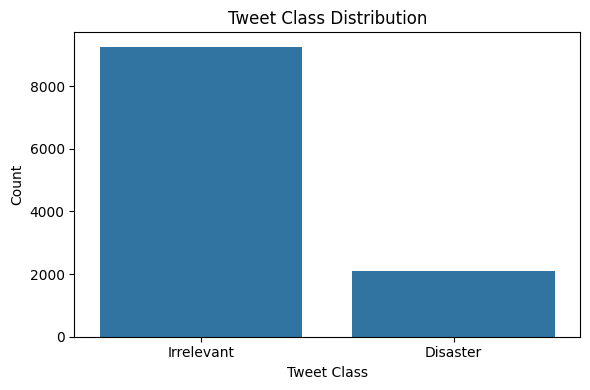

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv("tweets (1).csv")  # Load data from the correct file path

# Show structure
print(df.info())
print(df.head())

# Class distribution
class_counts = df['target'].value_counts()
print("Class Distribution:\n", class_counts)

# Random sample tweets
urgent_tweets = df[df['target'] == 1]['text'].sample(3, random_state=1)
irrelevant_tweets = df[df['target'] == 0]['text'].sample(3, random_state=1)

print("\nUrgent Disaster Tweets:")
print(urgent_tweets.to_string(index=False))

print("\nIrrelevant Tweets:")
print(irrelevant_tweets.to_string(index=False))

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Tweet Class Distribution')
plt.xticks([0, 1], ['Irrelevant', 'Disaster'])
plt.xlabel('Tweet Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [7]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Force download of punkt (tokenizer), stopwords, and punkt_tab
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab', force=True)


# Re-assign stopwords after downloading
stop_words = set(stopwords.words('english'))

# Preprocessing function
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')

    # Convert to lowercase
    text = text.lower()

    # Handle elongated words (e.g., "soooo" → "soo")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    return tokens

# Example usage
sample = "Sooo scary!!! Earthquake in #California. Stay safe! 😱😱 https://t.co/example"
print("Cleaned Tokens:", clean_text(sample))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned Tokens: ['soo', 'scary', 'earthquake', 'stay', 'safe']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


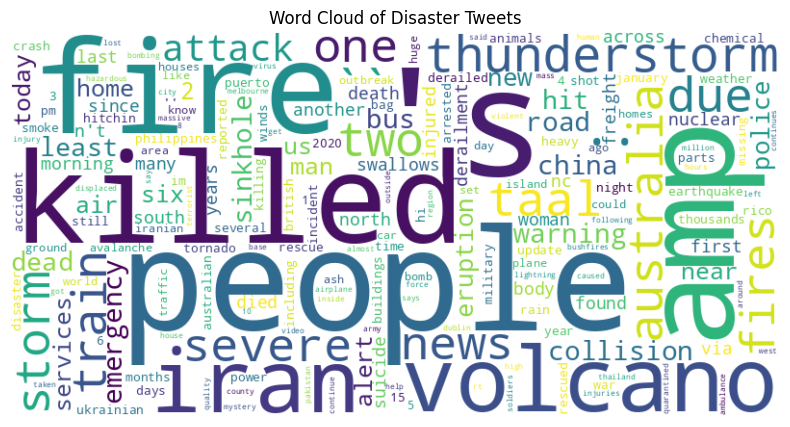

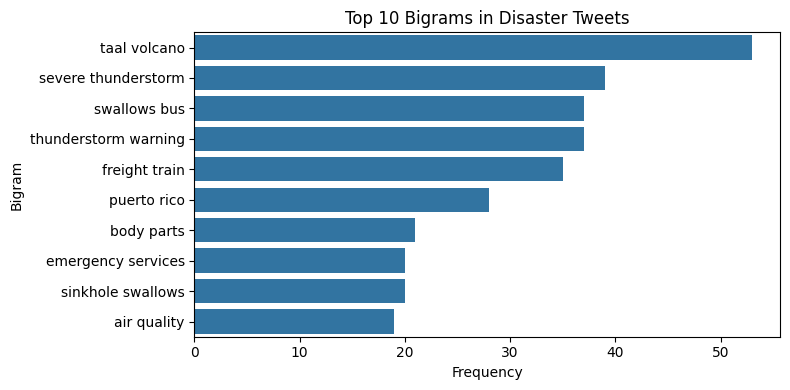

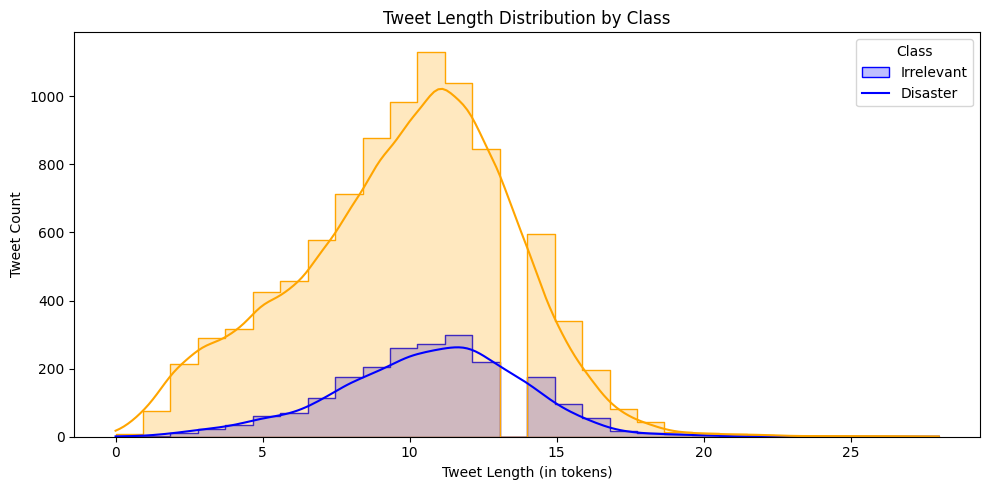

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource


# Load your dataset
df = pd.read_csv("tweets (1).csv")  # Replace with your dataset path
stop_words = set(stopwords.words('english'))

# --- Preprocessing function ---
def clean_and_tokenize(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = text.lower()
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

# Filter disaster tweets (target = 1)
disaster_df = df[df['target'] == 1].copy()
disaster_df['tokens'] = disaster_df['text'].apply(clean_and_tokenize)

# --- Q4: Word Cloud ---
all_words = [word for tokens in disaster_df['tokens'] for word in tokens]
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Tweets')
plt.show()

# --- Q4: Top 10 Bigrams ---
bigrams = [bigram for tokens in disaster_df['tokens'] for bigram in ngrams(tokens, 2)]
bigram_freq = Counter(bigrams).most_common(10)
bigram_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(8, 4))
sns.barplot(y=bigram_df['Bigram'].apply(lambda x: ' '.join(x)), x=bigram_df['Frequency'])
plt.title('Top 10 Bigrams in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

# --- Q5: Tweet Length Distribution ---
df['tokens'] = df['text'].apply(clean_and_tokenize)
df['length'] = df['tokens'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='length', hue='target', bins=30, kde=True, element="step", palette=['orange', 'blue'])
plt.title('Tweet Length Distribution by Class')
plt.xlabel('Tweet Length (in tokens)')
plt.ylabel('Tweet Count')
plt.legend(title='Class', labels=['Irrelevant', 'Disaster'])
plt.tight_layout()
plt.show()